In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Let's download the images from my laptop into the tensorflow images using imagedatagenerator

In [14]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 10,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 11203 images belonging to 10 classes.


In [4]:
test_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 3211 images belonging to 10 classes.


In [5]:
validation_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    rotation_range = 10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
)

Found 1597 images belonging to 10 classes.


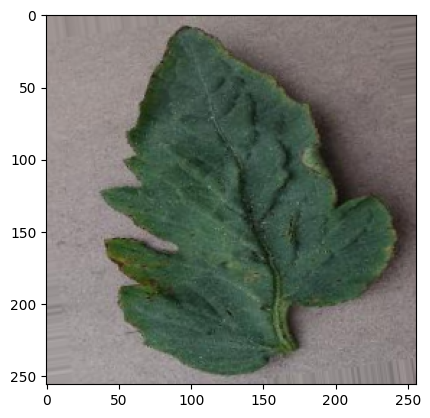

In [6]:
for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[0])
    break

In [7]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

In [8]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

C:\Users\ARTHUR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [11]:
11203/32

350.09375

In [12]:
1597/32

49.90625

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=49,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 920s 3s/step - accuracy: 0.5926 - loss: 1.1546 - val_accuracy: 0.7577 - val_loss: 0.7125
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6875 - loss: 0.6885 - val_accuracy: 0.6552 - val_loss: 0.8706
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 1122s 3s/step - accuracy: 0.7464 - loss: 0.7158 - val_accuracy: 0.8202 - val_loss: 0.5215
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6562 - loss: 0.7367 - val_accuracy: 0.8621 - val_loss: 0.4351
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 826s 2s/step - accuracy: 0.8153 - loss: 0.5241 - val_accuracy: 0.8406 - val_loss: 0.4627
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.4634 - val_accuracy: 0.7931 - val_loss: 0.5143
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 844s 2s/step - accuracy: 0.8500 - loss: 0.4325 - val_accuracy: 0.8559 - val_loss: 0.4190
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.2833 - val_accurac

In [16]:
scores = model.evaluate(test_generator)

101/101 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9066 - loss: 0.3001


In [17]:
scores

[0.33647558093070984, 0.8913111090660095]

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 350}

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
acc

[0.6443469524383545,
 0.6875,
 0.7638528347015381,
 0.65625,
 0.8199803233146667,
 0.875,
 0.8552501797676086,
 0.875,
 0.872169017791748,
 0.84375,
 0.893295168876648,
 0.96875,
 0.9064542055130005,
 0.875,
 0.9074389338493347,
 0.9375,
 0.9155849814414978,
 0.96875,
 0.9319667220115662,
 0.9375]

In [24]:
loss

[1.0149521827697754,
 0.688491702079773,
 0.6728600263595581,
 0.7366570234298706,
 0.5106467008590698,
 0.46342676877975464,
 0.414566308259964,
 0.28332483768463135,
 0.35206812620162964,
 0.4619271159172058,
 0.2952054738998413,
 0.11140362173318863,
 0.26396167278289795,
 0.32642480731010437,
 0.26813480257987976,
 0.14041173458099365,
 0.23350264132022858,
 0.1764778345823288,
 0.19683139026165009,
 0.20175138115882874]

Text(0.5, 1.0, 'Training and Validation Loss')

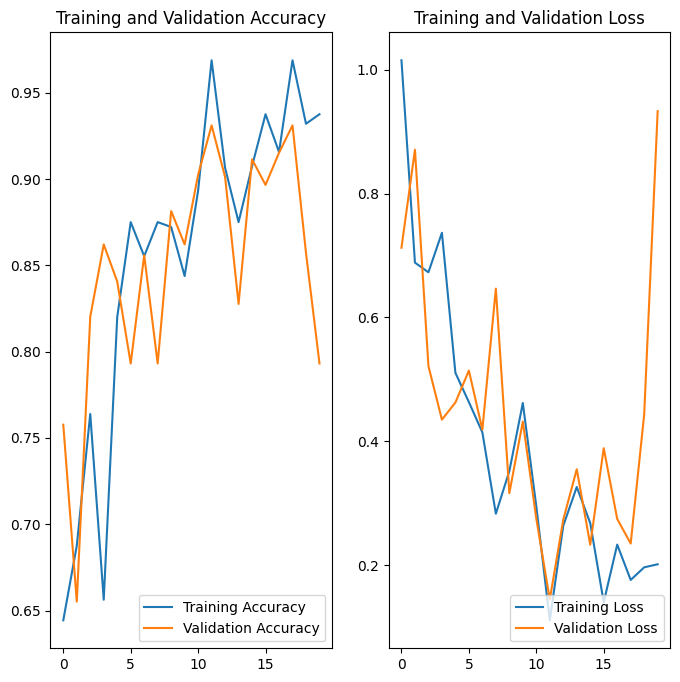

In [25]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label = 'Training Accuracy')
plt.plot(range(20), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label = 'Training Loss')
plt.plot(range(20), val_loss, label = 'Validation Loss')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')

In [26]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [27]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

first image to predict
actual label: Tomato_Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
predicted label: Tomato_Bacterial_spot


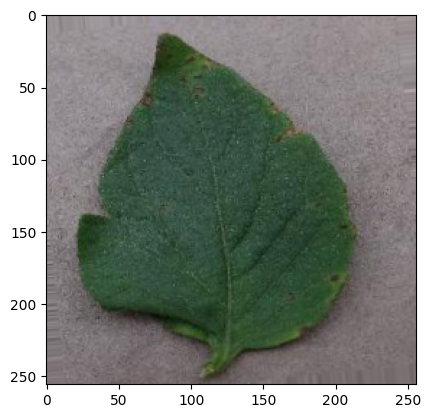

In [28]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

    break

### Now let's run inference on few sample images¶

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 78s 78s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


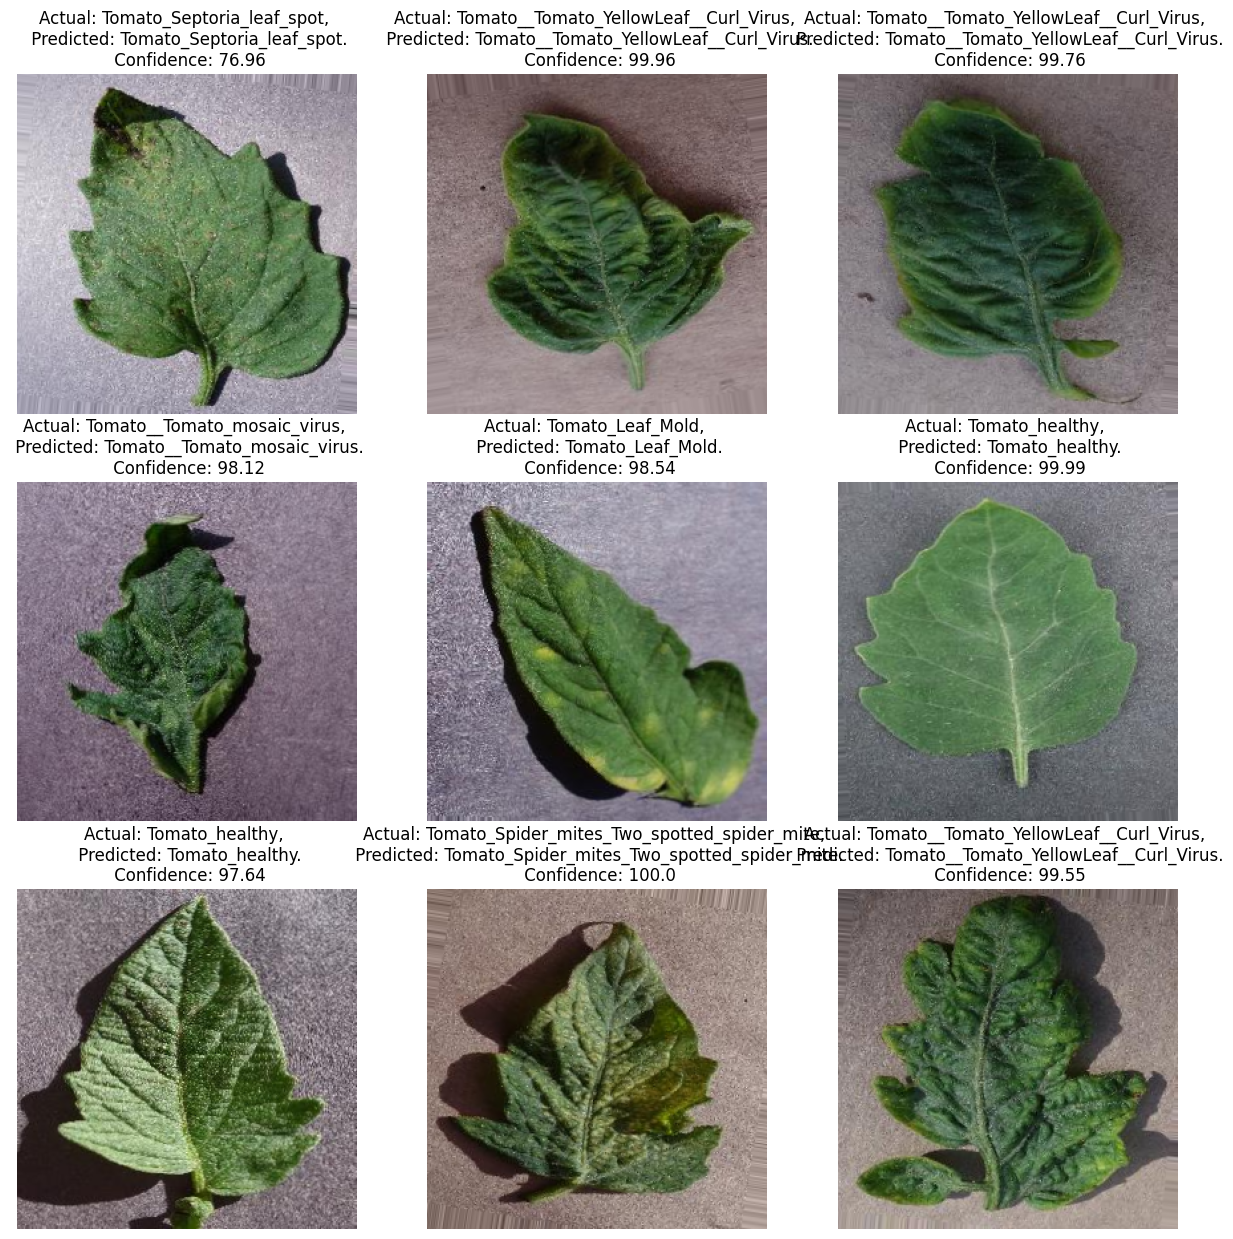

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}")

        plt.axis("off")
    break

## Saving The Model

### Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [31]:
model.save("../tomatoes.h5")

In [7]:
model_version = 1
model.export(f"../saved_model/{model_version}/")

INFO:tensorflow:Assets written to: ../saved_model/1/assets


INFO:tensorflow:Assets written to: ../saved_model/1/assets


Saved artifact at '../saved_model/1/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2516419660304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419662608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419659152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419662992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419664336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419665488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419665104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419666448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419666256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419667024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516419665872: TensorSpec(shape=(

In [8]:
import os
import tensorflow as tf

h5_model_path = "C:/Users/ARTHUR/deep_learning/End_to_End_Project/tomato-disease/saved_model/tomatoes.h5"


model = tf.keras.models.load_model(h5_model_path)
model_version = max([int(i) in os.listdir("../saved_model") + [0]]) + 1
model.export(f"../saved_models/{model_version}")

NameError: name 'i' is not defined

In [5]:
import os

h5_model_path = "C:/Users/ARTHUR/deep_learning/End_to_End_Project/tomato-disease/saved_model/tomatoes.h5"

if os.path.exists(h5_model_path):
    print(f"File found: {h5_model_path}")
else:
    print(f"File not found: {h5_model_path}")


File found: C:/Users/ARTHUR/deep_learning/End_to_End_Project/tomato-disease/saved_model/tomatoes.h5
